In this project we will explore https://datascience.stackexchange.com/
In this site people post questions relating to data science issues such as how to build specific models, which features to use and how to measure model accuracy


DSSE has a data base that we can explroe in order to get interesting data about the questiosn and answesr that we see on the site. looking at the database, if we want to look for the most popular content we would focus on the following tables:
Posts, 
Users,
Tags,
PostTags, 
Votes, 


First we will explore all the posts of type question (PostTypes.id = 1) from 2019. the query that we will use is this:  
select  id,  
        PostTypeId,  
        CreationDate,  
        Score,  
        ViewCount,  
        Tags,  
        AnswerCount,  
        FavoriteCount  
from Posts  
where PostTypeId = 1  
and year(CreationDate) = 2019  
order by ViewCount desc  



In [109]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

In [110]:
df = pd.read_csv("2019_questions.csv")

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


When exploring the results of this wuery we see the following:  
There are 8839 rows.  
All the columns don't have missing values besides FavoriteCount which has 7432 rows with missing values.  
We can replace these missing values by putting 0 instead.  
The Tags columns consists of html tags with the different tags. we can read the tags to a list so it will be easier to read them.  

In [112]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


Lets replace th missing values with 0

In [113]:
df.fillna(0,inplace = True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [115]:
df["CreationDate"] = df["CreationDate"].astype('datetime64[ns]')
df["FavoriteCount"] = df["FavoriteCount"].astype('int64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [117]:

df['Tags'] = df['Tags'].str.replace("><",",")
df['Tags'] = df['Tags'].str.replace("<","")
df['Tags'] = df['Tags'].str.replace(">","")
df['Tags'] = df['Tags'].str.split(',')

In [118]:
print(df['Tags'])

0                         [machine-learning, data-mining]
1       [machine-learning, regression, linear-regressi...
2            [python, time-series, forecast, forecasting]
3                   [machine-learning, scikit-learn, pca]
4                [dataset, bigdata, data, speech-to-text]
5                                           [fuzzy-logic]
6       [time-series, anomaly-detection, online-learning]
7                                  [matrix-factorisation]
8                   [correlation, naive-bayes-classifier]
9       [machine-learning, python, deep-learning, kera...
10                                     [machine-learning]
11                             [machine-learning, theory]
12                   [machine-learning, gradient-descent]
13      [nlp, clustering, feature-extraction, encoding...
14                  [python, scikit-learn, pandas, numpy]
15      [python, scikit-learn, decision-trees, accurac...
16                                       [python, pandas]
17            

In this section we will create a dictionary with all the tags to count how many each tag appears.

In [119]:
tags = {}
def count_tags(tag_list):    
    for x in tag_list:
        
        if x in tags:
                tags[x] +=1
        else:
                tags[x] = 1

    return tags



df['Tags'].apply(count_tags)
#sort_tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)




0       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
1       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
2       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
3       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
4       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
5       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
6       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
7       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
8       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
9       {'ml': 7, 'colab': 18, 'audio-recognition': 25...
10      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
11      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
12      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
13      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
14      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
15      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
16      {'ml': 7, 'colab': 18, 'audio-recognition': 25...
17      {'ml':

In [120]:
tags = sorted(tags.items(), key=lambda x: x[1], reverse=True)


In [121]:
print(type(tags))

<class 'list'>


Print how many times each tag was used:

In [122]:

print(tags)

[('machine-learning', 2693), ('python', 1814), ('deep-learning', 1220), ('neural-network', 1055), ('keras', 935), ('classification', 685), ('tensorflow', 584), ('scikit-learn', 540), ('nlp', 493), ('cnn', 489), ('time-series', 466), ('lstm', 402), ('pandas', 354), ('regression', 347), ('dataset', 340), ('r', 268), ('predictive-modeling', 265), ('clustering', 257), ('statistics', 234), ('machine-learning-model', 224), ('data-mining', 217), ('data', 213), ('image-classification', 211), ('feature-selection', 209), ('reinforcement-learning', 203), ('data-science-model', 186), ('pytorch', 175), ('linear-regression', 175), ('xgboost', 165), ('feature-engineering', 163), ('loss-function', 161), ('random-forest', 159), ('data-cleaning', 157), ('logistic-regression', 154), ('rnn', 149), ('training', 148), ('decision-trees', 145), ('cross-validation', 139), ('svm', 136), ('multiclass-classification', 131), ('prediction', 128), ('visualization', 126), ('optimization', 124), ('natural-language-pro

Print a bar chart to show the top ten used tags

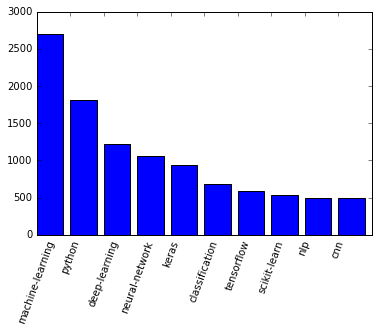

In [123]:
sort_tags = tags[0:10]
plt.bar(range(len(sort_tags)), [val[1] for val in sort_tags])
plt.xticks(range(len(sort_tags)), [val[0] for val in sort_tags])
plt.xticks(rotation=70)
plt.show()

Now we will check how many times each tag was viewed. For this we will search each tag in every post and if it appears in that post we will accumulate the total views of the post.

In [124]:
tag_list = [val[0] for val in tags]

In [125]:
print(tag_list)

['machine-learning', 'python', 'deep-learning', 'neural-network', 'keras', 'classification', 'tensorflow', 'scikit-learn', 'nlp', 'cnn', 'time-series', 'lstm', 'pandas', 'regression', 'dataset', 'r', 'predictive-modeling', 'clustering', 'statistics', 'machine-learning-model', 'data-mining', 'data', 'image-classification', 'feature-selection', 'reinforcement-learning', 'data-science-model', 'pytorch', 'linear-regression', 'xgboost', 'feature-engineering', 'loss-function', 'random-forest', 'data-cleaning', 'logistic-regression', 'rnn', 'training', 'decision-trees', 'cross-validation', 'svm', 'multiclass-classification', 'prediction', 'visualization', 'optimization', 'natural-language-process', 'computer-vision', 'preprocessing', 'word-embeddings', 'numpy', 'text-mining', 'convnet', 'unsupervised-learning', 'object-detection', 'autoencoder', 'recommender-system', 'convolution', 'gradient-descent', 'bigdata', 'multilabel-classification', 'anomaly-detection', 'recurrent-neural-net', 'accura

In [128]:
tot_view = {}
def count_views(row):  
    views = row['ViewCount']
    tag_col = row['Tags']
    for x in tag_col:
        if x in tot_view:
            tot_view[x] += views
        else:
            tot_view[x] = views
 

df.apply(count_views, axis=1)


0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
8809    None
8810    None
8811    None
8812    None
8813    None
8814    None
8815    None
8816    None
8817    None
8818    None
8819    None
8820    None
8821    None
8822    None
8823    None
8824    None
8825    None
8826    None
8827    None
8828    None
8829    None
8830    None
8831    None
8832    None
8833    None
8834    None
8835    None
8836    None
8837    None
8838    None
Length: 8839, dtype: object

In [129]:
print(tot_view)

{'ml': 569, 'colab': 2532, 'audio-recognition': 2195, 'java': 745, 'confusion-matrix': 8261, 'non-parametric': 70, 'google-prediction-api': 44, 'encoding': 18843, 'dbscan': 4449, 'anova': 70, 'seaborn': 32244, 'clusters': 506, 'helmert-coding': 26, 'objective-function': 75, 'word-embeddings': 18632, 'pattern-recognition': 23, 'activity-recognition': 126, 'survival-analysis': 1711, 'gbm': 1457, 'noisification': 9, 'pickle': 803, 'reference-request': 863, 'libsvm': 54, 'outlier': 8173, 'python-3.x': 452, 'cloud': 395, 'tableau': 287, 'discriminant-analysis': 464, 'activation-function': 13121, 'graphs': 4947, 'yolo': 3735, 'state-of-the-art': 17, 'nn': 115, 'transformer': 16305, 'actor-critic': 1014, 'keras-rl': 673, 'ocr': 2245, 'discounted-reward': 368, 'object-recognition': 2157, 'word2vec': 15979, 'reshape': 414, 'anonymization': 381, 'ridge-regression': 607, 'model-selection': 3604, 'h2o': 539, 'cause-effect-relations': 42, 'tesseract': 65, 'multi-instance-learning': 72, 'kaggle': 10

Sort dictionary by values descending

In [130]:
views = sorted(tot_view.items(), key=lambda x: x[1], reverse=True)

print(views)

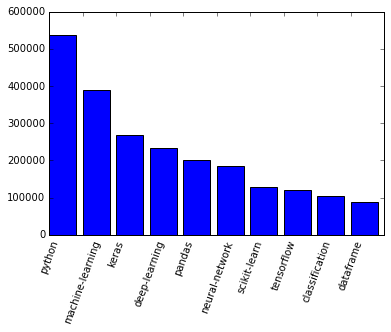

In [132]:
sort_views = views[0:10]
plt.bar(range(len(sort_views)), [val[1] for val in sort_views])
plt.xticks(range(len(sort_views)), [val[0] for val in sort_views])
plt.xticks(rotation=70)
plt.show()

While machine-learning is the top used tag, python is the most viewed one. 

In this section we will explore the the behaviour of deep learning tag:  
how many questiosn are sked over time? 
What is the trend? is it going up?   


For this we have extracted from DSSE database all the questions ever asked by this query: 
SELECT Id, CreationDate, Tags  
  FROM posts  
 WHERE PostTypeId = 1;  


In [134]:
questions = pd.read_csv("all_questions.csv")

In [135]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null object
Tags            21576 non-null object
dtypes: int64(1), object(2)
memory usage: 505.8+ KB


In [136]:
questions["CreationDate"] = questions["CreationDate"].astype('datetime64[ns]')

In [138]:
questions['Tags'] = questions['Tags'].str.replace("><",",")
questions['Tags'] = questions['Tags'].str.replace("<","")
questions['Tags'] = questions['Tags'].str.replace(">","")
questions['Tags'] = questions['Tags'].str.split(',')

Check per post if it contains a tag related to deep learning

In [140]:
deep_tags = [s for s in tag_list if "deep" in s]
print(deep_tags)

['deep-learning', 'deep-network', 'deepmind']


since deepmind is a goole department we will remove this tag and work only with the first two

In [142]:
deep_tags = ['deep-learning', 'deep-network']

In [144]:
def is_deep(d_tag):
    for x in d_tag:
        if x in deep_tags:
            return 1
        else:
            return 0
questions['is_deep'] = questions['Tags'].apply(is_deep)

In [146]:
questions['is_deep'].value_counts()

0    20585
1      991
Name: is_deep, dtype: int64

now we will break the dataframe per month and see how many questions related to deep learning per each period and how it relates to the total questions 

In [151]:
questions['yearmonth'] = questions["CreationDate"].astype(str).str[0:4] + questions["CreationDate"].astype(str).str[5:7]

In [153]:
questions['yearmonth'] = questions['yearmonth'].astype('int')

In [164]:
pivot = questions.pivot_table(index="yearmonth",columns="is_deep", aggfunc='size')

In [172]:
pivot.fillna(0,inplace=True)
pivot['total_questions'] = pivot[0] + pivot[1]
pivot['deep_rate'] = pivot[1] / pivot['total_questions'] * 100

In [173]:
print(pivot)

is_deep        0     1  total_questions  deep_rate
yearmonth                                         
201405      58.0   0.0             58.0   0.000000
201406      99.0   0.0             99.0   0.000000
201407      76.0   0.0             76.0   0.000000
201408      65.0   0.0             65.0   0.000000
201409      48.0   0.0             48.0   0.000000
201410      71.0   0.0             71.0   0.000000
201411      64.0   0.0             64.0   0.000000
201412      81.0   0.0             81.0   0.000000
201501      63.0   0.0             63.0   0.000000
201502      73.0   0.0             73.0   0.000000
201503      53.0   1.0             54.0   1.851852
201504      71.0   0.0             71.0   0.000000
201505      92.0   0.0             92.0   0.000000
201506     121.0   0.0            121.0   0.000000
201507     114.0   3.0            117.0   2.564103
201508     101.0   0.0            101.0   0.000000
201509      93.0   0.0             93.0   0.000000
201510     115.0   0.0         

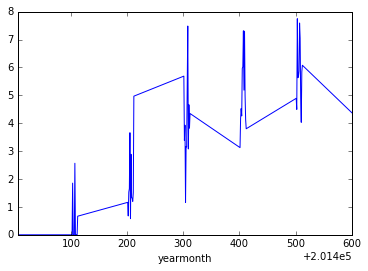

In [212]:
rate = pivot['deep_rate']
rate.plot();




it looks like over time the popularity of these tags in increasing